# Pretrained Models

## Aim: To implement a pretrained model for multi-class image classification.

### Dataset used: Images of animals belonging to 3 classes namely
  * Cats
  * Dogs
  * Tiger

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import glob as gb
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras as keras
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization
from keras.layers import Flatten, Conv2D, MaxPooling2D,Dropout
from keras.models import Model,Sequential
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from tensorflow.keras.utils import plot_model
from collections import Counter

In [ ]:
train_dir="/content/drive/MyDrive/classify/train"
test_dir="/content/drive/MyDrive/classify/test"
val_dir="/content/drive/MyDrive/classify/val"

In [ ]:
datagen = ImageDataGenerator()
train_data=datagen.flow_from_directory(train_dir,
                                       target_size=(150,150),
                                       batch_size=250,
                                       shuffle=True,
                                       class_mode='categorical')

test_data=datagen.flow_from_directory(test_dir,
                                       target_size=(150,150),
                                       batch_size=50,
                                       shuffle=True,
                                       class_mode='categorical')
test,label=test_data.next()
val_data=datagen.flow_from_directory(val_dir,
                                       target_size=(150,150),
                                       batch_size=100,
                                       shuffle=True,
                                       class_mode='categorical')

Found 298 images belonging to 3 classes.
Found 67 images belonging to 3 classes.
Found 63 images belonging to 3 classes.


In [ ]:
print(train_data.class_indices)
Counter(train_data.classes)

{'cats': 0, 'dogs': 1, 'tiger': 2}


Counter({0: 125, 1: 68, 2: 105})

In [ ]:
print(test_data.class_indices)
Counter(test_data.classes)

{'cats': 0, 'dogs': 1, 'tiger': 2}


Counter({0: 28, 1: 16, 2: 23})

In [ ]:
print(val_data.class_indices)
Counter(val_data.classes)

{'cats': 0, 'dogs': 1, 'tiger': 2}


Counter({0: 27, 1: 14, 2: 22})

In [ ]:
import tensorflow as tf
model = Sequential()
pretrained_model_for_demo= tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(150,150,3),
    pooling='avg',
    classes=3,
    weights='imagenet')
for each_layer in pretrained_model_for_demo.layers:
  each_layer.trainable=False
model.add(pretrained_model_for_demo)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_data,epochs=20,validation_data=val_data,
                              verbose=1)

Epoch 1/20
2/2 [==============================] - 51s 37s/step - loss: 5.3307 - accuracy: 0.4262 - val_loss: 1.2221 - val_accuracy: 0.6190
Epoch 2/20
2/2 [==============================] - 23s 7s/step - loss: 1.2606 - accuracy: 0.6644 - val_loss: 2.2104 - val_accuracy: 0.5238
Epoch 3/20
2/2 [==============================] - 25s 22s/step - loss: 1.6064 - accuracy: 0.6208 - val_loss: 0.5472 - val_accuracy: 0.7778
Epoch 4/20
2/2 [==============================] - 25s 22s/step - loss: 0.2520 - accuracy: 0.9027 - val_loss: 0.1902 - val_accuracy: 0.9206
Epoch 5/20
2/2 [==============================] - 25s 21s/step - loss: 0.3125 - accuracy: 0.8826 - val_loss: 0.6383 - val_accuracy: 0.7937
Epoch 6/20
2/2 [==============================] - 24s 8s/step - loss: 0.4253 - accuracy: 0.8557 - val_loss: 0.6268 - val_accuracy: 0.7937
Epoch 7/20
2/2 [==============================] - 25s 8s/step - loss: 0.3582 - accuracy: 0.8691 - val_loss: 0.3289 - val_accuracy: 0.8571
Epoch 8/20
2/2 [==============

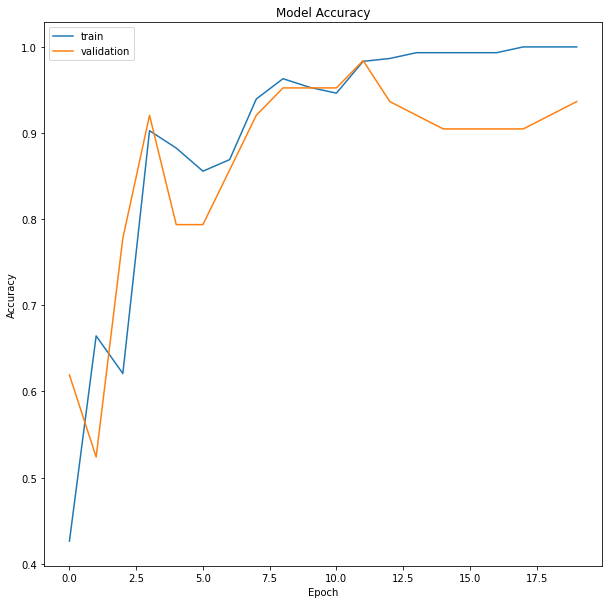

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

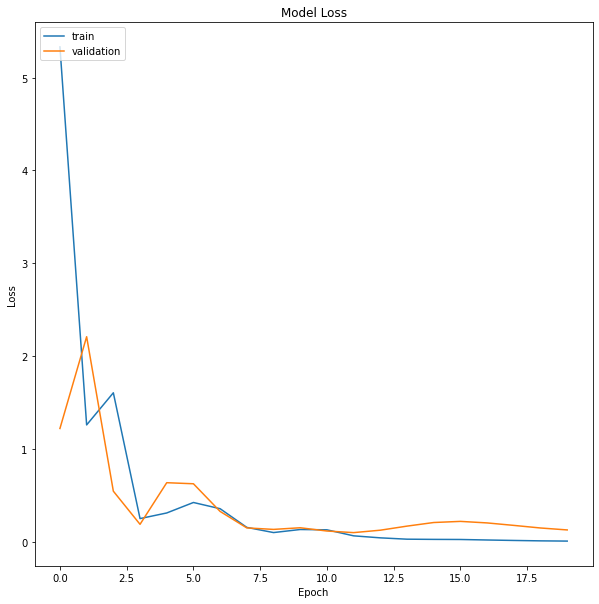

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
score=model.evaluate(test_data)
print("Loss:",score[0])
print("Accuracy score:",score[1])

2/2 [==============================] - 5s 2s/step - loss: 0.3878 - accuracy: 0.8657
Loss: 0.3877679407596588
Accuracy score: 0.8656716346740723


## Conclusion: The pretrained model used for the multiclass classification is ResNet50. The train accuracy obtained is 99%, validation accuracy is 96% and the test accuracy is 88%. Therefore we can conclude that the model is classifying the images accurately.